In [1]:
# break down the answers by award recipient type.... first figure out how to filter responses

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_raw = pd.read_csv("2018 NCWIT Award for Aspirations in Computing Recipient.csv")
df_raw.head(1)

,Respondent ID,Please select the category that best describes you (you may choose more than one).,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Which Award event(s) did you attend?,"If you did not attend an event, please let us know why.",Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,"Because of this Award, I am more...","Because of this Award, I am less...",Is there anything else you would like to share with us regarding the Award for Aspirations in Computing?
0,NaN,2018 National Award Winner,2018 National Award Honorable Mention,2018 Affiliate (Regional) Award Winner,2018 Affiliate (Regional) Award Honorable Mention,2018 NCWIT Certificate of Distinction,Response,Open-Ended Response,Response,Other (please specify),...,Increased my confidence in my ability to pursu...,Positively impacted my self-esteem.,"Helped me see myself as a ""computing person.""",Made me feel part of a community of women in c...,Fed my interest in a computing career.,Inspired me to emulate the successful women I ...,Motivated me to stay in touch with the young w...,Open-Ended Response,Open-Ended Response,Open-Ended Response


In [9]:
df_13 = pd.read_csv("Question13Breakdown.csv")
df_13.columns

Index(['Respondent ID',
       'Please select the category that best describes you (you may choose more than one).',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'If you did not attend an event, please let us know why.',
       'Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?',
       'Unnamed: 9',
       'Have you joined the NCWIT Aspirations in Computing Facebook group?',
       'In order to improve our program, please tell us why you have not joined the Facebook Group.',
       'What is the best way for NCWIT to communicate opportunities with you?',
       'In addition to Facebook, what would be the best way(s) for you to connect with the rest of the Aspirations community?',
       'Please provide us with specific feedback that can help improve the Aspirations Award application process.',
       'I was motivated to apply for this Award because... (you may select as many as apply)',
       'Unna

In [3]:
# prints what values are in each column
print(df_raw["Please select the category that best describes you (you may choose more than one)."].unique())
print(df_raw["Unnamed: 2"].unique())
print(df_raw["Unnamed: 3"].unique())
print(df_raw["Unnamed: 4"].unique())
print(df_raw["Unnamed: 5"].unique())

['2018 National Award Winner' nan]
['2018 National Award Honorable Mention' nan]
['2018 Affiliate (Regional) Award Winner' nan]
['2018 Affiliate (Regional) Award Honorable Mention' nan]
['2018 NCWIT Certificate of Distinction' nan]


## National Award Winner

In [5]:
naw = df_raw[df_raw["Please select the category that best describes you (you may choose more than one)."] == "2018 National Award Winner"]
print("# of National Award Winners: ", len(naw))

# of National Award Winners:  86


In [26]:
# Which award event they attended
df_gb = naw.groupby("Which Award event(s) did you attend?")
agg_d = {'Respondent ID' : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg = df_agg.drop('Response').reset_index()
df_agg

,Which Award event(s) did you attend?,Respondent ID
0,Affiliate (Regional) Award,33
1,Both,14
2,"National Award in Charlotte, NC",11
3,None,27


Text(0,0.5,'Event')

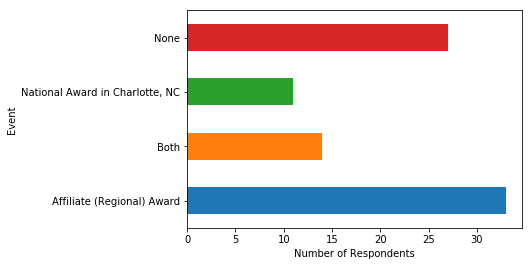

In [31]:
ax = df_agg.plot('Which Award event(s) did you attend?', 'Respondent ID', kind = 'barh')
ax.legend_.remove()

plt.xlabel('Number of Respondents')
plt.ylabel('Event')

In [47]:
# Who was most influential in applying?
df_gb = naw.groupby("Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?")
agg_d = {"Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?" : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg

,Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?
Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?,
Friend,3
"Mentor/Coach/Moderator (for example, robotics or other technology club leader)",7
Myself,13
Parent/Guardian or Family Member,7
Response,1
Teacher/Educator,55


In [56]:
# Are they in the FB group?
df_gb = naw.groupby('Have you joined the NCWIT Aspirations in Computing Facebook group?')
agg_d = {'Have you joined the NCWIT Aspirations in Computing Facebook group?' : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg

,Have you joined the NCWIT Aspirations in Computing Facebook group?
Have you joined the NCWIT Aspirations in Computing Facebook group?,
No,51
Response,1
Yes,34


In [137]:
# Ratings for question 11
q11 = naw[["Please rate the following Impact items from Strongly Agree to Strongly Disagree.Being a recipient of the Award for Aspirations in Computing...",
                    'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
                    "Unnamed: 29"]].dropna().replace("Strongly Disagree", 1).replace("Disagree", 2).replace("Neither Agree nor Disagree", 3).replace("Agree", 4).replace("Strongly Agree", 5)
#q11.head(2)
naw_11 = q11.iloc[1:].mean().round(3)
naw_11

Please rate the following Impact items from Strongly Agree to Strongly Disagree.Being a recipient of the Award for Aspirations in Computing...    4.150
Unnamed: 23                                                                                                                                       4.150
Unnamed: 24                                                                                                                                       4.183
Unnamed: 25                                                                                                                                       4.067
Unnamed: 26                                                                                                                                       4.300
Unnamed: 27                                                                                                                                       4.250
Unnamed: 28                                                                             

In [17]:
# I am more... 
naw13 = df_13[df_13["Please select the category that best describes you (you may choose more than one)."] == "2018 National Award Winner"]
naw13

df_gb = naw13.groupby('Unnamed: 31')
agg_d = {'Respondent ID' : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg.sort_values('Respondent ID', ascending = False)

,Respondent ID
Unnamed: 31,
C,35
M,6
O,5
E,4
CN,3
A,2


## National Award Honorable Mention

In [36]:
nahm = df_raw[df_raw["Unnamed: 2"] == "2018 National Award Honorable Mention"]
print("# of National Award Honorable Mention: ", len(nahm))

# of National Award Honorable Mention:  298


In [43]:
# Which award event they attended
naw13 = 

df_gb = nahm.groupby("Which Award event(s) did you attend?")
agg_d = {'Which Award event(s) did you attend?' : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg

,Which Award event(s) did you attend?
Which Award event(s) did you attend?,
Affiliate (Regional) Award,177
Both,3
"National Award in Charlotte, NC",3
None,114
Response,1


In [48]:
# Who was most influential in applying?
df_gb = nahm.groupby("Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?")
agg_d = {"Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?" : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg

,Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?
Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?,
Friend,21
"Mentor/Coach/Moderator (for example, robotics or other technology club leader)",18
Myself,57
Other (please specify),3
Parent/Guardian or Family Member,33
Response,1
Teacher/Educator,164


In [57]:
# Are they in the FB group?
df_gb = nahm.groupby('Have you joined the NCWIT Aspirations in Computing Facebook group?')
agg_d = {'Have you joined the NCWIT Aspirations in Computing Facebook group?' : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg

,Have you joined the NCWIT Aspirations in Computing Facebook group?
Have you joined the NCWIT Aspirations in Computing Facebook group?,
No,143
Response,1
Yes,153


In [138]:
# Ratings for question 11
q11 = nahm[["Please rate the following Impact items from Strongly Agree to Strongly Disagree.Being a recipient of the Award for Aspirations in Computing...",
                    'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
                    "Unnamed: 29"]].dropna().replace("Strongly Disagree", 1).replace("Disagree", 2).replace("Neither Agree nor Disagree", 3).replace("Agree", 4).replace("Strongly Agree", 5)
#q11.head(2)
nahm_11 = q11.iloc[1:].mean().round(3)
nahm_11

Please rate the following Impact items from Strongly Agree to Strongly Disagree.Being a recipient of the Award for Aspirations in Computing...    4.011
Unnamed: 23                                                                                                                                       4.179
Unnamed: 24                                                                                                                                       4.326
Unnamed: 25                                                                                                                                       4.114
Unnamed: 26                                                                                                                                       4.310
Unnamed: 27                                                                                                                                       4.038
Unnamed: 28                                                                             

In [18]:
# I am more... 
nahm13 = df_13[df_13["Unnamed: 2"] == "2018 National Award Honorable Mention"]
nahm13

df_gb = nahm13.groupby('Unnamed: 31')
agg_d = {'Respondent ID' : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg.sort_values('Respondent ID', ascending = False)

,Respondent ID
Unnamed: 31,
C,109
M,25
A,15
E,13
I,11
O,9
B,4
CN,4


## Affiliate Award Winner

In [37]:
aaw = df_raw[df_raw["Unnamed: 3"] == "2018 Affiliate (Regional) Award Winner"]
print("# of Affiliate Award Winners: ", len(aaw))

# of Affiliate Award Winners:  770


In [44]:
# Which award event they attended
df_gb = aaw.groupby("Which Award event(s) did you attend?")
agg_d = {'Which Award event(s) did you attend?' : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg

,Which Award event(s) did you attend?
Which Award event(s) did you attend?,
Affiliate (Regional) Award,560
Both,12
"National Award in Charlotte, NC",7
None,189
Response,1


In [53]:
# Who was most influential in applying?
df_gb = aaw.groupby("Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?")
agg_d = {"Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?" : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg

,Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?
Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?,
Friend,42
"Mentor/Coach/Moderator (for example, robotics or other technology club leader)",56
Myself,112
Other (please specify),10
Parent/Guardian or Family Member,90
Response,1
Teacher/Educator,457


In [58]:
# Are they in the FB group?
df_gb = aaw.groupby('Have you joined the NCWIT Aspirations in Computing Facebook group?')
agg_d = {'Have you joined the NCWIT Aspirations in Computing Facebook group?' : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg

,Have you joined the NCWIT Aspirations in Computing Facebook group?
Have you joined the NCWIT Aspirations in Computing Facebook group?,
No,387
Response,1
Yes,380


In [139]:
# Ratings for question 11
q11 = aaw[["Please rate the following Impact items from Strongly Agree to Strongly Disagree.Being a recipient of the Award for Aspirations in Computing...",
                    'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
                    "Unnamed: 29"]].dropna().replace("Strongly Disagree", 1).replace("Disagree", 2).replace("Neither Agree nor Disagree", 3).replace("Agree", 4).replace("Strongly Agree", 5)
#q11.head(2)
aaw_11 = q11.iloc[1:].mean().round(3)
aaw_11

Please rate the following Impact items from Strongly Agree to Strongly Disagree.Being a recipient of the Award for Aspirations in Computing...    3.973
Unnamed: 23                                                                                                                                       4.203
Unnamed: 24                                                                                                                                       4.348
Unnamed: 25                                                                                                                                       4.100
Unnamed: 26                                                                                                                                       4.334
Unnamed: 27                                                                                                                                       4.040
Unnamed: 28                                                                             

In [19]:
# I am more... 
aaw13 = df_13[df_13["Unnamed: 3"] == "2018 Affiliate (Regional) Award Winner"]

df_gb = aaw13.groupby('Unnamed: 31')
agg_d = {'Respondent ID' : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg.sort_values('Respondent ID', ascending = False)

,Respondent ID
Unnamed: 31,
C,301
M,80
A,42
I,39
O,31
E,24
CN,10
B,4


##  Affiliate Award Honorable Mention

In [38]:
ahm = df_raw[df_raw["Unnamed: 4"] == "2018 Affiliate (Regional) Award Honorable Mention"]
print("# of Affiliate Award Honorable Mention: ", len(ahm))

# of Affiliate Award Honorable Mention:  484


In [45]:
# Which award event they attended
df_gb = ahm.groupby("Which Award event(s) did you attend?")
agg_d = {'Which Award event(s) did you attend?' : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg

,Which Award event(s) did you attend?
Which Award event(s) did you attend?,
Affiliate (Regional) Award,299
Both,4
"National Award in Charlotte, NC",2
None,176
Response,1


In [54]:
# Who was most influential in applying?
df_gb = ahm.groupby("Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?")
agg_d = {"Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?" : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg

,Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?
Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?,
Friend,18
"Mentor/Coach/Moderator (for example, robotics or other technology club leader)",40
Myself,76
Other (please specify),7
Parent/Guardian or Family Member,48
Response,1
Teacher/Educator,291


In [59]:
# Are they in the FB group?
df_gb = ahm.groupby('Have you joined the NCWIT Aspirations in Computing Facebook group?')
agg_d = {'Have you joined the NCWIT Aspirations in Computing Facebook group?' : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg

,Have you joined the NCWIT Aspirations in Computing Facebook group?
Have you joined the NCWIT Aspirations in Computing Facebook group?,
No,281
Response,1
Yes,199


In [140]:
# Ratings for question 11
q11 = ahm[["Please rate the following Impact items from Strongly Agree to Strongly Disagree.Being a recipient of the Award for Aspirations in Computing...",
                    'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
                    "Unnamed: 29"]].dropna().replace("Strongly Disagree", 1).replace("Disagree", 2).replace("Neither Agree nor Disagree", 3).replace("Agree", 4).replace("Strongly Agree", 5)
#q11.head(2)
ahm_11 = q11.iloc[1:].mean().round(3)
ahm_11

Please rate the following Impact items from Strongly Agree to Strongly Disagree.Being a recipient of the Award for Aspirations in Computing...    3.980
Unnamed: 23                                                                                                                                       4.177
Unnamed: 24                                                                                                                                       4.184
Unnamed: 25                                                                                                                                       3.986
Unnamed: 26                                                                                                                                       4.252
Unnamed: 27                                                                                                                                       4.034
Unnamed: 28                                                                             

In [20]:
# I am more... 
ahm13 = df_13[df_13["Unnamed: 4"] == "2018 Affiliate (Regional) Award Honorable Mention"]

df_gb = ahm13.groupby('Unnamed: 31')
agg_d = {'Respondent ID' : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg.sort_values('Respondent ID', ascending = False)

,Respondent ID
Unnamed: 31,
C,167
M,53
A,30
I,26
O,17
E,16
CN,6
B,3


## NCWIT Certificate of Distinction

In [39]:
cod = df_raw[df_raw["Unnamed: 5"] == "2018 NCWIT Certificate of Distinction"]
print("# of NCWIT Certificate of Distinction: ", len(cod))

# of NCWIT Certificate of Distinction:  209


In [46]:
# Which award event they attended
df_gb = cod.groupby("Which Award event(s) did you attend?")
agg_d = {'Which Award event(s) did you attend?' : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg

,Which Award event(s) did you attend?
Which Award event(s) did you attend?,
Affiliate (Regional) Award,12
None,195
Response,1


In [55]:
# Who was most influential in applying?
df_gb = cod.groupby("Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?")
agg_d = {"Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?" : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg

,Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?
Who was most influential in encouraging you to apply for the NCWIT Aspirations in Computing Award?,
Friend,9
"Mentor/Coach/Moderator (for example, robotics or other technology club leader)",15
Myself,16
Other (please specify),3
Parent/Guardian or Family Member,19
Response,1
Teacher/Educator,145


In [60]:
# Are they in the FB group?
df_gb = cod.groupby('Have you joined the NCWIT Aspirations in Computing Facebook group?')
agg_d = {'Have you joined the NCWIT Aspirations in Computing Facebook group?' : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg

,Have you joined the NCWIT Aspirations in Computing Facebook group?
Have you joined the NCWIT Aspirations in Computing Facebook group?,
No,181
Response,1
Yes,26


In [141]:
# Ratings for question 11
q11 = cod[["Please rate the following Impact items from Strongly Agree to Strongly Disagree.Being a recipient of the Award for Aspirations in Computing...",
                    'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
                    "Unnamed: 29"]].dropna().replace("Strongly Disagree", 1).replace("Disagree", 2).replace("Neither Agree nor Disagree", 3).replace("Agree", 4).replace("Strongly Agree", 5)
#q11.head(2)
cod_11 = q11.iloc[1:].mean().round(3)
cod_11

Please rate the following Impact items from Strongly Agree to Strongly Disagree.Being a recipient of the Award for Aspirations in Computing...    3.747
Unnamed: 23                                                                                                                                       4.000
Unnamed: 24                                                                                                                                       4.025
Unnamed: 25                                                                                                                                       3.797
Unnamed: 26                                                                                                                                       3.810
Unnamed: 27                                                                                                                                       3.835
Unnamed: 28                                                                             

In [21]:
# I am more... 
cod13 = df_13[df_13["Unnamed: 5"] == "2018 NCWIT Certificate of Distinction"]

df_gb = cod13.groupby('Unnamed: 31')
agg_d = {'Respondent ID' : 'count'}
df_agg = df_gb.agg(agg_d)
df_agg.sort_values('Respondent ID', ascending = False)

,Respondent ID
Unnamed: 31,
C,62
M,27
A,11
I,11
E,6
B,4
CN,4
O,4
